In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os

def sigmoidFunction(x):
  return 1 / (1 + np.exp(-x))

def hypothesisFunction(w, x, b):
    z = np.dot(w, x.T) + b
    return sigmoidFunction(z)

def lossFunction(w, x, y, b):
    hyp = hypothesisFunction(w, x, b)
    p1 = np.dot( y, np.log(hyp) )
    p2 = np.dot( np.add(1, np.multiply(-1, y)), np.log(np.add(1, np.multiply(-1, hyp))) )
    Z = np.sum(np.add(p1, p2))
    return np.multiply(-1/x.shape[0] , Z)


In [2]:
%matplotlib inline

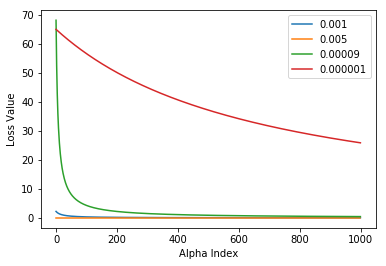

In [3]:

if __name__ == '__main__':
    
    file = "data.csv"
    
    filename = os.path.join(file)
    
    attributes = ['UpperLeft','UpperMiddle','UpperRight','MiddleLeft','MiddleMiddle','MiddleRight','LowerLeft','LowerMiddle','LowerRight','Outcome']
    df = pd.read_csv(filename, names = attributes)
    
    random.seed(1)
    np.random.seed(1)
    
    w = np.array([np.random.rand(9)])
    x = df[['UpperLeft','UpperMiddle','UpperRight','MiddleLeft','MiddleMiddle','MiddleRight','LowerLeft','LowerMiddle','LowerRight']].as_matrix() #features values
    y = df[['Outcome']].as_matrix()
    
    b = 0
    
    wBackup = w.copy()

    alpha = [0.001, 0.005, 0.00009, 0.000001]
    
    lossHistory = [[], [], [], []]
    
    for i in range(len(alpha)):
        w = wBackup.copy()
        for iteration in range(1000):
            m = x.shape[0]
            a = hypothesisFunction(w, x, b)
            dz = a - y
            dw = 0
            dw = np.sum(np.dot(x.T, dz))
            dw /= m
            db = 0
            db = np.sum(dz)
            db /= m
            w =  w - alpha[i] * dw
            b =  b - alpha[i] * db
            lossHistory[i].append(lossFunction(w, x, y, b))
        plt.plot(lossHistory[i])
    plt.ylabel('Loss Value')
    plt.xlabel('Alpha Index')
    plt.legend(('0.001', '0.005', '0.00009', '0.000001'))
    plt.show()
    
    